In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(pd.__version__)

2.0.3


In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/galaxy.csv")

In [4]:
data.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,NaN,Space Gray,Galaxy_S8,contains description,0,0,1


In [5]:
data.columns

Index(['BuyItNow', 'startprice', 'carrier', 'color', 'productline',
       'noDescription', 'charCountDescription', 'upperCaseDescription',
       'sold'],
      dtype='object')

### 미국 이베이 사이트의 삼성 휴대폰 판매 데이터
* BuyItNow: 바로구매
* startprice: 시작가격
* carrier: 통신사
* color: 휴대폰 색상
* productline: 휴대폰 모델명
* noDescription: 설명글 유무
* charCountDescription: 설명글 길이
* upperCaseDescription: 대문자 설명, 대문자로 표기 - 강조
* sold: 판매 결과 - 종속변수, Target

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               316 non-null    object 
 3   color                 892 non-null    object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [8]:
data.isna().sum()

BuyItNow                   0
startprice                 0
carrier                 1169
color                    593
productline                0
noDescription              0
charCountDescription       0
upperCaseDescription       0
sold                       0
dtype: int64

In [9]:
data2 =data.copy()

* 결측값 처리 - carrier와 color는 제품 구매에 영향을 미칠 수 있으므로 결측값을 unknown으로 처리

In [10]:
data = data.fillna("unknown")

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               1485 non-null   object 
 3   color                 1485 non-null   object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


* EDA

In [13]:
data['BuyItNow'].value_counts()

BuyItNow
0    818
1    667
Name: count, dtype: int64

In [15]:
data.describe()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,0.449158,216.844162,31.184512,2.863300,0.461953
std,0.497576,172.893308,41.744518,9.418585,0.498718
min,0.000000,0.010000,0.000000,0.000000,0.000000
25%,0.000000,80.000000,0.000000,0.000000,0.000000
50%,0.000000,198.000000,0.000000,0.000000,0.000000
75%,1.000000,310.000000,79.000000,2.000000,1.000000
max,1.000000,999.000000,111.000000,81.000000,1.000000


<Axes: ylabel='Frequency'>

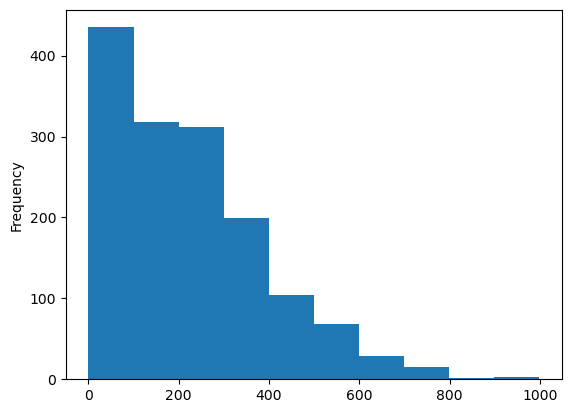

In [16]:
data['startprice'].plot(kind='hist')

<Axes: >

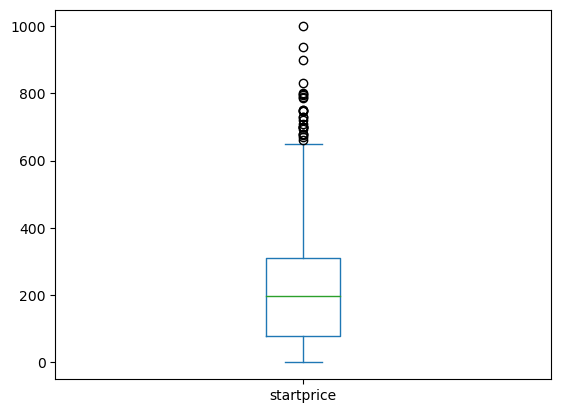

In [17]:
data['startprice'].plot(kind='box')

<Axes: ylabel='Frequency'>

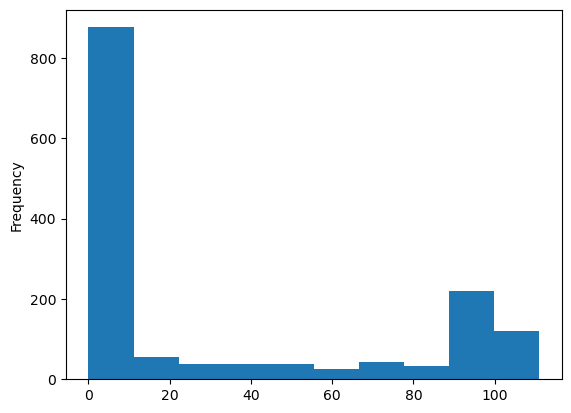

In [25]:
data['charCountDescription'].plot(kind='hist')

In [20]:
data['carrier'].value_counts()

carrier
unknown            1169
AT&T                177
Verizon              87
Sprint/T-Mobile      52
Name: count, dtype: int64

In [21]:
data['color'].value_counts()

color
unknown           593
White             328
Midnight Black    274
Space Gray        180
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: count, dtype: int64

In [22]:
data['productline'].value_counts()

productline
Galaxy_Note10    351
Galaxy_S8        277
Galaxy_S7        227
Unknown          204
Galaxy_S9        158
Galaxy_Note8     153
Galaxy_Note9     107
Galaxy_S10         8
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

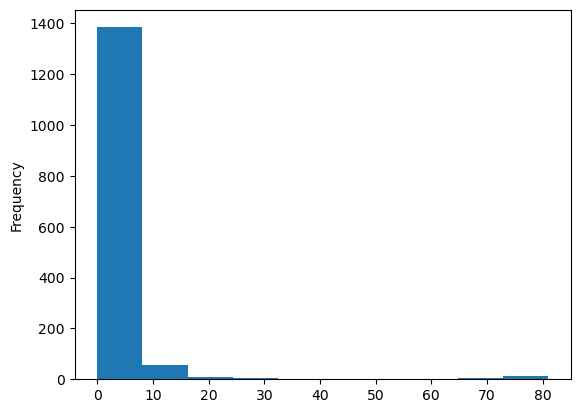

In [24]:
data['upperCaseDescription'].plot(kind='hist')

In [26]:
data['noDescription'].value_counts()

noDescription
contains description    856
no description          629
Name: count, dtype: int64

* feature engineering

In [27]:
data['color'].value_counts()

color
unknown           593
White             328
Midnight Black    274
Space Gray        180
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: count, dtype: int64

In [28]:
def black(x):
    if 'Black' in x:
        return 'Black'
    else:
        return x

In [31]:
data['color'] = data['color'].apply(lambda x: 'Black' if 'Black' in x else x)

In [32]:
data['color'].value_counts()

color
unknown       593
Black         332
White         328
Space Gray    180
Gold           52
Name: count, dtype: int64

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               1485 non-null   object 
 3   color                 1485 non-null   object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [34]:
data.groupby("BuyItNow")['sold'].value_counts(sort=False)

BuyItNow  sold
0         0       639
          1       179
1         0       160
          1       507
Name: count, dtype: int64

<Axes: xlabel='BuyItNow,sold'>

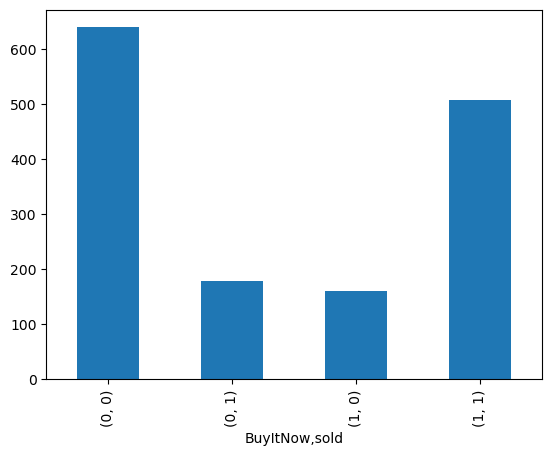

In [35]:
data.groupby("BuyItNow")['sold'].value_counts(sort=False).plot(kind='bar')

In [37]:
# buyit now가 0일때 sold
179 / (179+639) * 100

21.882640586797066

In [38]:
# buyit now가 1일때 sold
507 / (507+160) * 100

76.01199400299849

<Axes: xlabel='carrier,sold'>

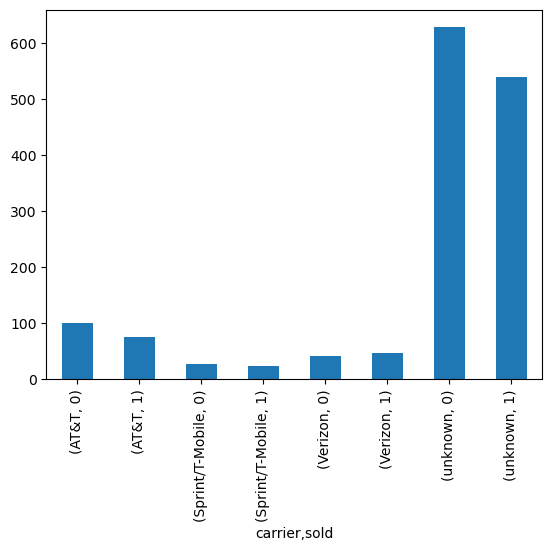

In [42]:
data.groupby("carrier")['sold'].value_counts(sort=False).plot(kind='bar')

<Axes: xlabel='color,sold'>

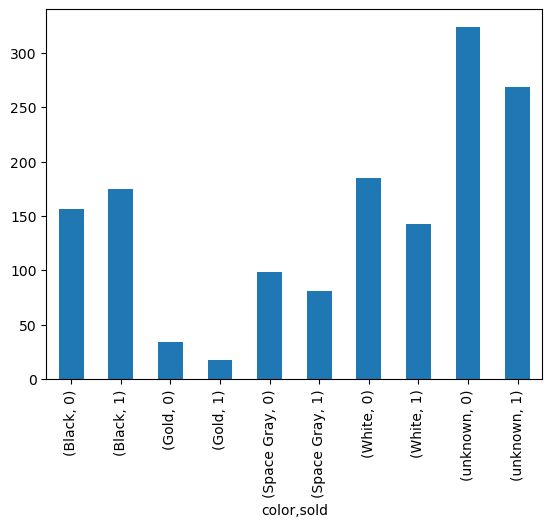

In [43]:
data.groupby("color")['sold'].value_counts(sort=False).plot(kind='bar')

<Axes: xlabel='productline,sold'>

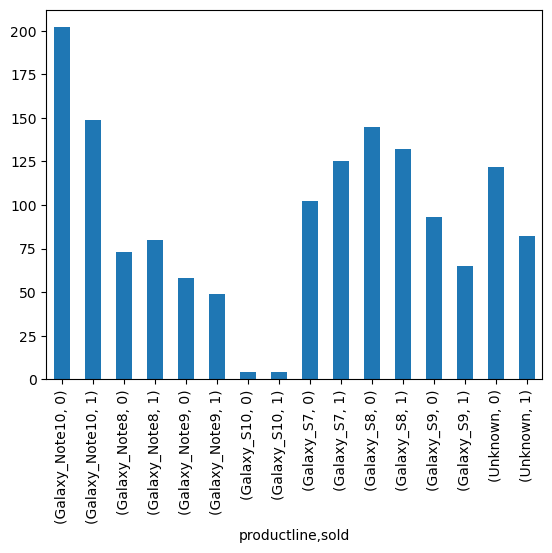

In [44]:
data.groupby("productline")['sold'].value_counts(sort=False).plot(kind='bar')

<Axes: xlabel='noDescription,sold'>

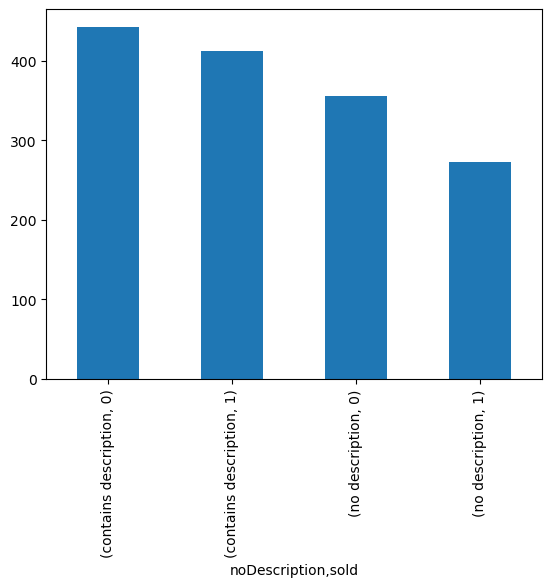

In [45]:
data.groupby("noDescription")['sold'].value_counts(sort=False).plot(kind='bar')

In [46]:
data.columns

Index(['BuyItNow', 'startprice', 'carrier', 'color', 'productline',
       'noDescription', 'charCountDescription', 'upperCaseDescription',
       'sold'],
      dtype='object')

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               1485 non-null   object 
 3   color                 1485 non-null   object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [51]:
data = pd.get_dummies(data, columns=['carrier', 'color', 'productline', 'noDescription'], drop_first=True)

In [52]:
data.head()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold,carrier_Sprint/T-Mobile,carrier_Verizon,carrier_unknown,color_Gold,color_Space Gray,color_White,color_unknown,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown,noDescription_no description
0,0,199.99,0,0,1,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False
1,0,235.00,0,0,0,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False
2,0,199.99,100,2,0,False,False,True,False,False,False,True,False,False,False,False,False,False,True,True
3,1,175.00,0,0,1,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
4,1,100.00,0,0,1,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False


In [53]:
X = data.drop('sold', axis=1)
y = data['sold']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=10)

In [58]:
X_test

,BuyItNow,startprice,charCountDescription,upperCaseDescription,carrier_Sprint/T-Mobile,carrier_Verizon,carrier_unknown,color_Gold,color_Space Gray,color_White,color_unknown,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown,noDescription_no description
1121,1,700.00,0,0,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False
372,0,110.00,103,10,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True
1129,0,300.00,0,0,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False
1317,1,0.99,101,0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True
1109,0,339.99,0,0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,1,150.00,0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1117,1,0.99,0,0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
301,1,242.00,0,0,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False
1462,0,429.00,0,0,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False


In [55]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
model = DecisionTreeClassifier(max_depth=5, random_state=10)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [62]:
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.7508417508417509
[[123  25]
 [ 49 100]]
              precision    recall  f1-score   support

           0       0.72      0.83      0.77       148
           1       0.80      0.67      0.73       149

    accuracy                           0.75       297
   macro avg       0.76      0.75      0.75       297
weighted avg       0.76      0.75      0.75       297



In [63]:
for i in range(1,10):
    model = DecisionTreeClassifier(max_depth=i, random_state=10)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(i, accuracy_score(y_test, pred))

1 0.7912457912457912
2 0.7171717171717171
3 0.7407407407407407
4 0.7272727272727273
5 0.7508417508417509
6 0.7609427609427609
7 0.7441077441077442
8 0.7441077441077442
9 0.7508417508417509


In [85]:
model = DecisionTreeClassifier(max_depth=3, random_state=10)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(i, accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

9 0.7407407407407407
[[132  16]
 [ 61  88]]
              precision    recall  f1-score   support

           0       0.68      0.89      0.77       148
           1       0.85      0.59      0.70       149

    accuracy                           0.74       297
   macro avg       0.77      0.74      0.73       297
weighted avg       0.77      0.74      0.73       297



* 중요 변수 추출하기 


In [86]:
pred[:3]

array([0, 0, 0], dtype=int64)

In [87]:
print(model.predict_proba(X_test)[:3])

[[0.62162162 0.37837838]
 [0.74708171 0.25291829]
 [0.83986928 0.16013072]]


In [88]:
model.feature_names_in_

array(['BuyItNow', 'startprice', 'charCountDescription',
       'upperCaseDescription', 'carrier_Sprint/T-Mobile',
       'carrier_Verizon', 'carrier_unknown', 'color_Gold',
       'color_Space Gray', 'color_White', 'color_unknown',
       'productline_Galaxy_Note8', 'productline_Galaxy_Note9',
       'productline_Galaxy_S10', 'productline_Galaxy_S7',
       'productline_Galaxy_S8', 'productline_Galaxy_S9',
       'productline_Unknown', 'noDescription_no description'],
      dtype=object)

In [89]:
model.feature_importances_

array([0.72109539, 0.25294678, 0.        , 0.00687853, 0.        ,
       0.        , 0.0190793 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [90]:
importance = pd.DataFrame(model.feature_importances_, columns=['importance'], index=model.feature_names_in_)

In [91]:
importance

,importance
BuyItNow,0.721095
startprice,0.252947
charCountDescription,0.000000
upperCaseDescription,0.006879
carrier_Sprint/T-Mobile,0.000000
carrier_Verizon,0.000000
carrier_unknown,0.019079
color_Gold,0.000000
color_Space Gray,0.000000
color_White,0.000000


In [82]:
model.feature_names_in_

array(['BuyItNow', 'startprice', 'charCountDescription',
       'upperCaseDescription', 'carrier_Sprint/T-Mobile',
       'carrier_Verizon', 'carrier_unknown', 'color_Gold',
       'color_Space Gray', 'color_White', 'color_unknown',
       'productline_Galaxy_Note8', 'productline_Galaxy_Note9',
       'productline_Galaxy_S10', 'productline_Galaxy_S7',
       'productline_Galaxy_S8', 'productline_Galaxy_S9',
       'productline_Unknown', 'noDescription_no description'],
      dtype=object)

[Text(0.5, 0.875, 'BuyItNow <= 0.5\ngini = 0.495\nsamples = 1188\nvalue = [651, 537]'),
 Text(0.25, 0.625, 'startprice <= 251.44\ngini = 0.339\nsamples = 660\nvalue = [517, 143]'),
 Text(0.125, 0.375, 'carrier_unknown <= 0.5\ngini = 0.415\nsamples = 320\nvalue = [226, 94]'),
 Text(0.0625, 0.125, 'gini = 0.497\nsamples = 63\nvalue = [34, 29]'),
 Text(0.1875, 0.125, 'gini = 0.378\nsamples = 257\nvalue = [192, 65]'),
 Text(0.375, 0.375, 'upperCaseDescription <= 6.5\ngini = 0.247\nsamples = 340\nvalue = [291, 49]'),
 Text(0.3125, 0.125, 'gini = 0.269\nsamples = 306\nvalue = [257, 49]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 34\nvalue = [34, 0]'),
 Text(0.75, 0.625, 'startprice <= 142.475\ngini = 0.379\nsamples = 528\nvalue = [134, 394]'),
 Text(0.625, 0.375, 'startprice <= 3.0\ngini = 0.187\nsamples = 335\nvalue = [35, 300]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 104\nvalue = [0, 104]'),
 Text(0.6875, 0.125, 'gini = 0.257\nsamples = 231\nvalue = [35, 196]'),
 Text(0.875, 0.375

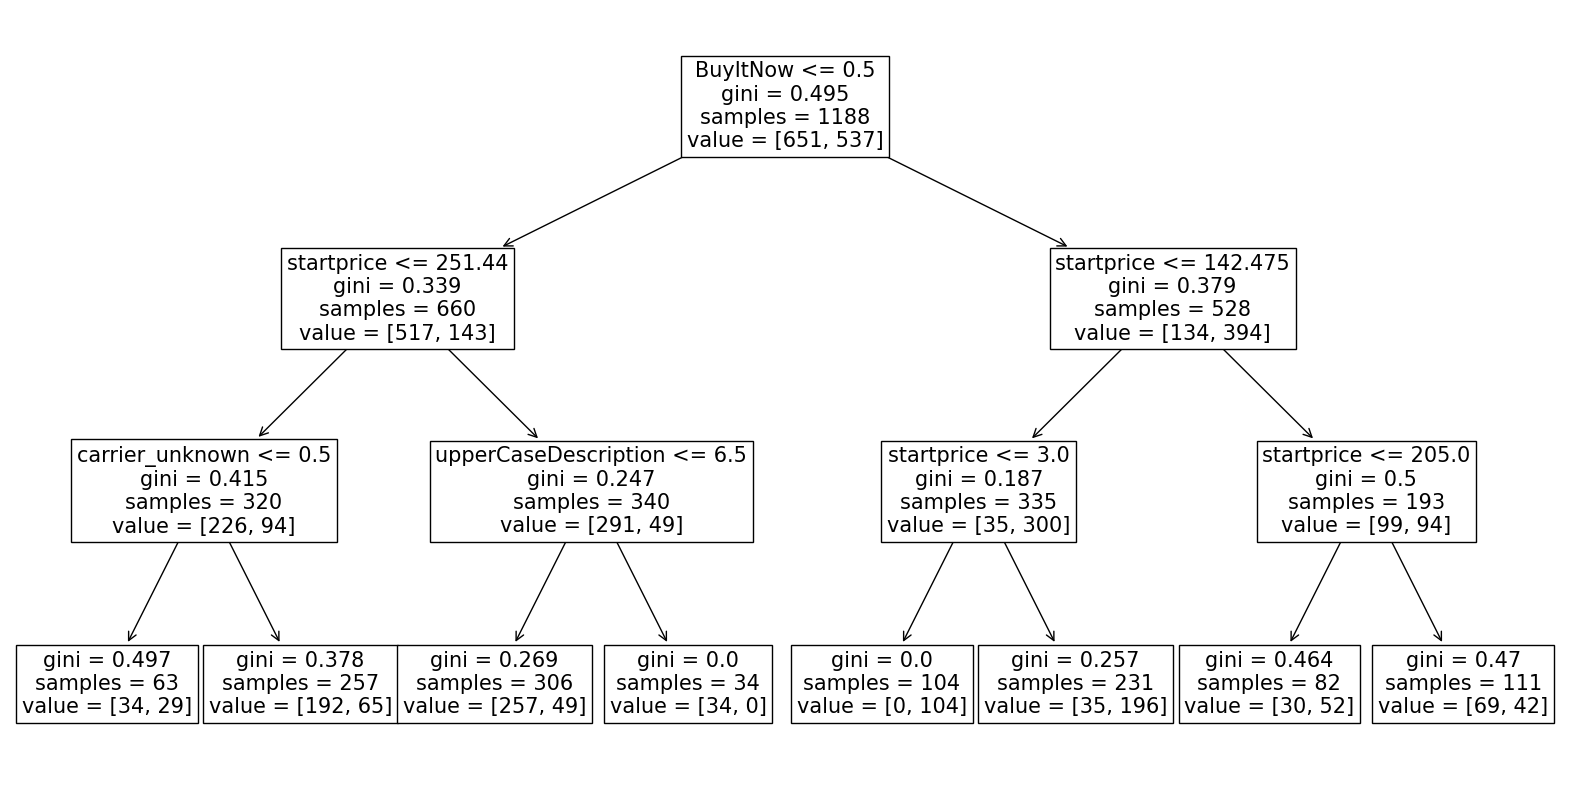

In [92]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model, max_depth=3, feature_names=list(model.feature_names_in_), precision=3, fontsize=15)